## EVALUATING ALGORITHM

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### READ DATASET

In [2]:
import pandas as pd
df = pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
X = df.drop(columns=['PassengerId','Name','Ticket','Survived'])
Y = df[['Survived']]

In [4]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [5]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [6]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [7]:
cat

['Sex', 'Cabin', 'Embarked']

In [8]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

### PREPROCESSING PIPELINE

In [9]:
cat1 = ['Cabin']
cat2= ['Sex','Embarked']

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [11]:
num_pipe= Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                          ('scaler',StandardScaler())])
cat_pipe1= Pipeline(steps=[('impute',SimpleImputer(strategy='constant',fill_value='unknown')),
                           ('ohe',OneHotEncoder(handle_unknown='ignore'))])
cat_pipe2= Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                           ('ohe',OneHotEncoder(handle_unknown='ignore'))])
pre= ColumnTransformer([('num',num_pipe,con),
                         ('cat1',cat_pipe1,cat1),
                         ('cat2',cat_pipe2,cat2)])

In [12]:
x_pre = pre.fit_transform(X).toarray()
x_pre

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ]])

In [13]:
cols= pre.get_feature_names_out()
cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat1__Cabin_A10', 'cat1__Cabin_A14', 'cat1__Cabin_A16',
       'cat1__Cabin_A19', 'cat1__Cabin_A20', 'cat1__Cabin_A23',
       'cat1__Cabin_A24', 'cat1__Cabin_A26', 'cat1__Cabin_A31',
       'cat1__Cabin_A32', 'cat1__Cabin_A34', 'cat1__Cabin_A36',
       'cat1__Cabin_A5', 'cat1__Cabin_A6', 'cat1__Cabin_A7',
       'cat1__Cabin_B101', 'cat1__Cabin_B102', 'cat1__Cabin_B18',
       'cat1__Cabin_B19', 'cat1__Cabin_B20', 'cat1__Cabin_B22',
       'cat1__Cabin_B28', 'cat1__Cabin_B3', 'cat1__Cabin_B30',
       'cat1__Cabin_B35', 'cat1__Cabin_B37', 'cat1__Cabin_B38',
       'cat1__Cabin_B39', 'cat1__Cabin_B4', 'cat1__Cabin_B41',
       'cat1__Cabin_B42', 'cat1__Cabin_B49', 'cat1__Cabin_B5',
       'cat1__Cabin_B50', 'cat1__Cabin_B51 B53 B55',
       'cat1__Cabin_B57 B59 B63 B66', 'cat1__Cabin_B58 B60',
       'cat1__Cabin_B69', 'cat1__Cabin_B71', 'cat1__Cabin_B73',
       'cat1__Cabin_B77', 'cat1__Cabin_B78', 'c

In [14]:
x_pre= pd.DataFrame(x_pre,columns=cols)
x_pre

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat1__Cabin_A10,cat1__Cabin_A14,cat1__Cabin_A16,cat1__Cabin_A19,cat1__Cabin_A20,...,cat1__Cabin_F38,cat1__Cabin_F4,cat1__Cabin_G6,cat1__Cabin_T,cat1__Cabin_unknown,cat2__Sex_female,cat2__Sex_male,cat2__Embarked_C,cat2__Embarked_Q,cat2__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.181487,-0.474545,-0.473674,-0.386671,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
887,-1.566107,-0.796286,-0.474545,-0.473674,-0.044381,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
888,0.827377,-0.104637,0.432793,2.008933,-0.176263,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
889,-1.566107,-0.258337,-0.474545,-0.473674,-0.044381,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


### Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x_pre,Y,test_size=0.2,random_state=21)

In [16]:
xtrain.shape

(712, 158)

In [17]:
xtest.shape

(179, 158)

### ALGORITH EVALUATION

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [19]:
dct= {'logistic':LogisticRegression(),
      'Decision tree': DecisionTreeClassifier(),
      'Random forest':RandomForestClassifier(),
      'Gradient boost':GradientBoostingClassifier()} 

In [20]:
dct.items()

dict_items([('logistic', LogisticRegression()), ('Decision tree', DecisionTreeClassifier()), ('Random forest', RandomForestClassifier()), ('Gradient boost', GradientBoostingClassifier())])

### EVALUATE MODEL

In [21]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [22]:
tr=[]
tr_cv=[]
ts=[]

In [23]:
for name,model in dct.items():
    model.fit(xtrain,ytrain)
    ypred_tr=model.predict(xtrain)
    ypred_ts=model.predict(xtest)
    f1_tr=f1_score(ytrain,ypred_tr)
    score_tr=cross_val_score(model,xtrain,ytrain,cv=5,scoring='f1')
    score_svg=score_tr.mean()

    f1_ts=f1_score(ytest,ypred_ts)
    tr.append(f1_tr)
    ts.append(f1_ts)
    tr_cv.append(score_svg)
    print('\n---------------------------------------\n')
    print(f'Model Name : {name}\n')
    print(f'Training F1 score : {f1_tr:.4f}')
    print(f'5 fold cross validation f1 score : {score_svg:.4f}')
    print(f'Testing F1 score : {f1_ts:.4f}')


---------------------------------------

Model Name : logistic

Training F1 score : 0.7672
5 fold cross validation f1 score : 0.7131
Testing F1 score : 0.7746

---------------------------------------

Model Name : Decision tree

Training F1 score : 0.9849
5 fold cross validation f1 score : 0.6949
Testing F1 score : 0.7518

---------------------------------------

Model Name : Random forest

Training F1 score : 0.9831
5 fold cross validation f1 score : 0.7070
Testing F1 score : 0.7536

---------------------------------------

Model Name : Gradient boost

Training F1 score : 0.8646
5 fold cross validation f1 score : 0.7400
Testing F1 score : 0.7761


### RESULTS IN DATAFRAME

In [24]:
eval_dct= {'model':list(dct.keys()),
           'Training f1':tr,
           'testing f1':ts,
           'Training f1 cv': tr_cv}

In [25]:
eval_df=pd.DataFrame(eval_dct).T
eval_df

,0,1,2,3
model,logistic,Decision tree,Random forest,Gradient boost
Training f1,0.767176,0.984906,0.983051,0.864646
testing f1,0.774648,0.751773,0.753623,0.776119
Training f1 cv,0.713137,0.694915,0.707026,0.740039


In [29]:
model=GradientBoostingClassifier(random_state=42)

### HYPERPARAMETER TUNNING FOR GRADIENT BOOSTING CLASSIFIER

In [28]:
params= {'learning_rate':[0.001,0.01,0.05,0.1],
         'n_estimators':[10,50,100,200],
         'max_depth':[3,4,5,6,7,8,9,10],
         'min_samples_split':[6,7,8,9,10]}

In [30]:
from sklearn.model_selection import RandomizedSearchCV

In [31]:
rscv= RandomizedSearchCV(model,param_distributions=params,cv=5,scoring='f1')
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.05,
                                                          0.1],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'min_samples_split': [6, 7, 8, 9, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1')

In [32]:
rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 8,
 'max_depth': 7,
 'learning_rate': 0.05}

In [33]:
rscv.best_score_

0.7328474478135357

In [35]:
best_model=rscv.best_estimator_
best_model

GradientBoostingClassifier(learning_rate=0.05, max_depth=7, min_samples_split=8,
                           random_state=42)

### EVALUATING BEST MODEL

In [37]:
best_model.score(xtrain,ytrain)

0.9424157303370787

In [38]:
best_model.score(xtest,ytest)

0.8324022346368715

### PREDICTING TRAINING AND TESTING DATA

In [39]:
ypred_tr=best_model.predict(xtrain)
ypred_ts=best_model.predict(xtest)

In [40]:
ypred_tr[0:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [41]:
ytrain.head()

,Survived
793,0
23,1
97,1
9,1
157,0


In [42]:
ypred_ts[0:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [43]:
ytest.head()

,Survived
617,0
379,0
725,0
826,0
450,0


### CONFUSION MATRIX


In [44]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


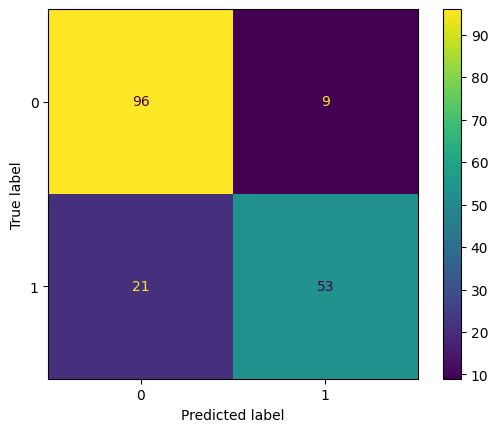

In [45]:
cf=confusion_matrix(ytest,ypred_ts)
cfd=ConfusionMatrixDisplay(cf,display_labels=best_model.classes_)
cfd.plot()

### CLASSIFICATION REPORT 

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       105
           1       0.85      0.72      0.78        74

    accuracy                           0.83       179
   macro avg       0.84      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



### CALCULATING AUC AND ROC SCORE

In [49]:
from sklearn.metrics import roc_auc_score

In [50]:
yprob_tr=best_model.predict_proba(xtrain)[:,1]
yprob_ts=best_model.predict_proba(xtest)[:,1]

In [51]:
yprob_tr[0:5]

array([0.11699051, 0.80204991, 0.79764883, 0.97028437, 0.12855606])

In [52]:
yprob_ts[0:5]

array([0.84259292, 0.09988113, 0.09537803, 0.76357646, 0.09220029])

In [53]:
roc_auc_score(ytrain,yprob_tr)

0.9816122092241495

In [54]:
roc_auc_score(ytest,yprob_ts)

0.895945945945946

### PLOT ROC AUC CURVE

In [55]:
from sklearn.metrics import RocCurveDisplay


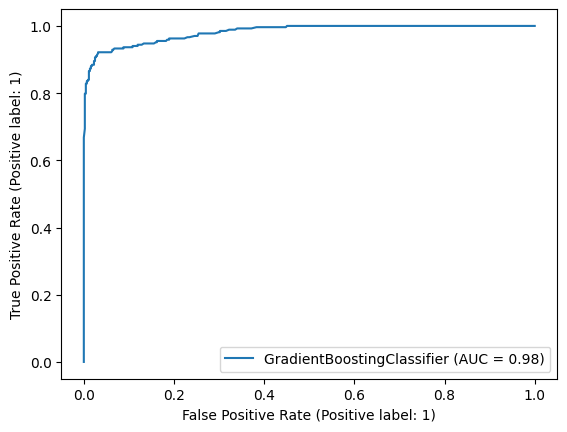

In [56]:
RocCurveDisplay.from_estimator(best_model,xtrain,ytrain)

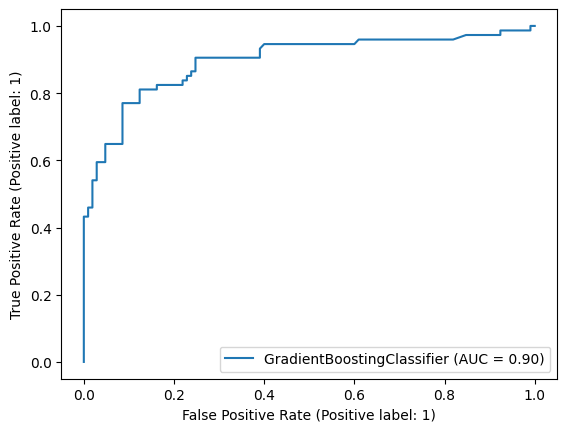

In [58]:
RocCurveDisplay.from_estimator(best_model,xtest,ytest)

### PREDICT TEST TITANIC

In [59]:
xnew=pd.read_csv('test_titanic.csv')
xnew

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [60]:
xnew_pre=pre.transform(xnew).toarray()
xnew_pre

array([[ 0.82737724,  0.39488658, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.82737724,  1.35550962,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.36936484,  2.50825727, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.82737724,  0.70228595, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724, -0.1046374 , -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  1.        ,
         0.        ,  0.        ]])

In [61]:
pred=best_model.predict(xnew_pre)
prob=best_model.predict_proba(xnew_pre)[:,1]


In [62]:
pred[0:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [63]:
prob[0:5]

array([0.07628609, 0.45621757, 0.15969337, 0.11682388, 0.6013078 ])

### CREATING RESULTS IN DATAFRAME

In [64]:
df_results= xnew[['PassengerId']]
df_results['Survived']=pred
df_results['probability']=prob

In [65]:
df_results

,PassengerId,Survived,probability
0,892,0,0.076286
1,893,0,0.456218
2,894,0,0.159693
3,895,0,0.116824
4,896,1,0.601308
...,...,...,...
413,1305,0,0.089064
414,1306,1,0.977585
415,1307,0,0.067164
416,1308,0,0.089064


In [66]:
df_results.to_csv('Predictions_with_possibilties.csv',index=False)